# First part: Comparison of classifiers on simulated data

In [1]:
from sklearn.datasets import make_moons, make_circles, make_classification, make_blobs
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from matplotlib.colors import ListedColormap

The following are two useful functions for plotting a dataset (only training, or all data split into training and test) and the decision boundary of a model and the data

In [2]:
def plot_dataset(X_train, y_train, X_test=None, y_test=None):
    # -- function that plots the datapoints
    h = 0.02 # -- h is the step length
    x_min, x_max = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
    y_min, y_max = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # -- just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(1,1,1)
    ax.set_title("Input data")
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    
    if X_test is not None and y_test is not None:
        # -- Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.2, edgecolors="k")
    
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())

In [3]:
def plot_model(input_model, X_train, y_train, X_test, y_test):
    # -- function that plots the datapoints and decision boundaries of input_model
    h = 0.02
    x_min, x_max = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
    y_min, y_max = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # -- just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(1, 1, 1)
    
    ax.set_title("Model decision boundary")
    # -- Plot the decision boundary. For that, we will assign a color to each
    # -- point in the mesh [x_min, x_max]x[y_min, y_max].
    if hasattr(input_model, "decision_function"):
        Z = input_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = input_model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # -- Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)

    # -- Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c = y_train, cmap = cm_bright, edgecolors = "k")
    # -- Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c = y_test, cmap = cm_bright, edgecolors = "k", alpha = 0.2)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())

Let's generate an almost linearly separable dataset and run the perceptron first, than SVM, then a NN with default parameters

In [4]:
# -- generate a random n-classification dataset
X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)

# -- add noise to points exploiting a uniform distribution in order to get close to non-linear separability
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size = X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Let's plot the training dataset.

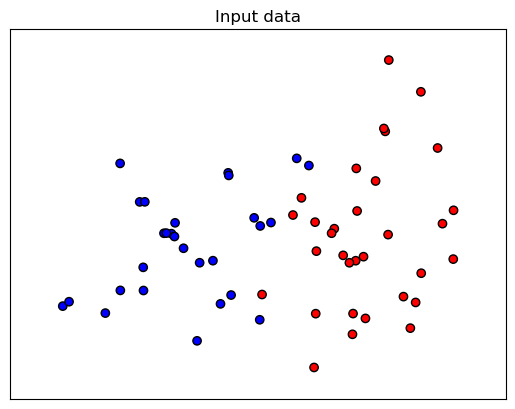

In [5]:
plot_dataset(X_train_scaled, y_train)

Let's now print all data (i.e., train and and test). The points in the test set are the most transparent that will be displayed.

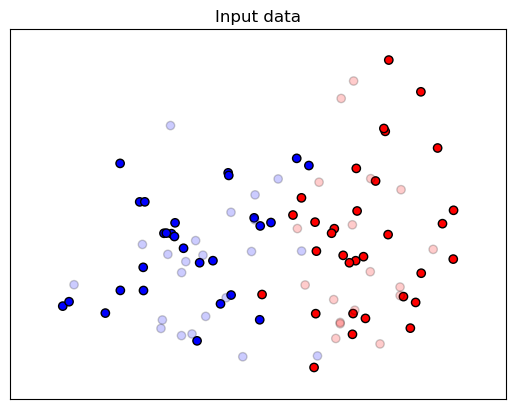

In [6]:
plot_dataset(X_train_scaled, y_train, X_test_scaled, y_test)

Now let's learn a perceptron, plot its decision boundary, and print the train error and the test error.

Training error = 0.06666666666666665
Test error = 0.15000000000000002


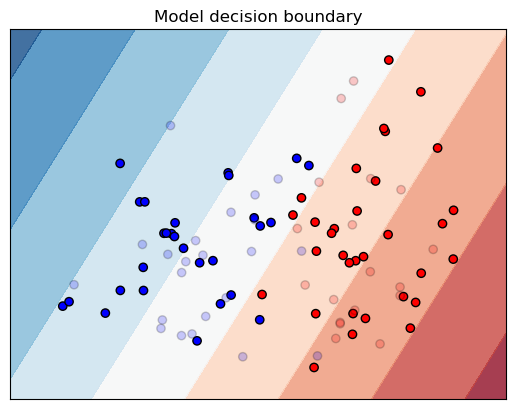

In [7]:
perceptron = Perceptron(random_state = 1213, tol=1e-4)
perceptron.fit(X_train_scaled, y_train)

plot_model(perceptron, X_train_scaled, y_train, X_test_scaled, y_test)

training_error = 1 - perceptron.score(X_train_scaled, y_train)
print("Training error =", training_error)

test_error = 1 - perceptron.score(X_test_scaled, y_test)
print("Test error =", test_error)

Let's do the same for SVM.

Training error = 0.050000000000000044
Test error = 0.050000000000000044


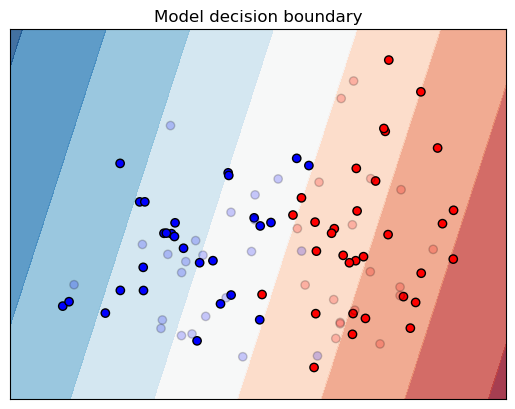

In [8]:
svm = SVC(kernel="linear", C=1)
svm.fit(X_train_scaled, y_train)

plot_model(svm, X_train_scaled, y_train, X_test_scaled, y_test)

training_error = 1 - svm.score(X_train_scaled, y_train)
print("Training error =", training_error)

test_error = 1 - svm.score(X_test_scaled, y_test)
print("Test error =", test_error)

Let's try with a NN.

Training error = 0.01666666666666672
Test error = 0.050000000000000044


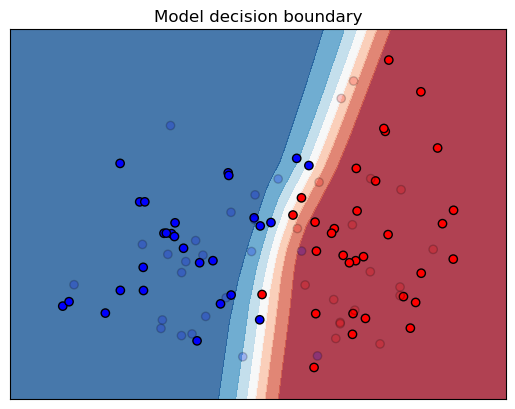

In [9]:
mlp = MLPClassifier(max_iter=1000)
mlp.fit(X_train_scaled, y_train)

plot_model(mlp, X_train_scaled, y_train, X_test_scaled, y_test)

training_error = 1 - mlp.score(X_train_scaled, y_train)
print("Training error =", training_error)

test_error = 1 - mlp.score(X_test_scaled, y_test)
print("Test error =", test_error)

---

Let's try now with some more complex dataset.

In [10]:
X, y = make_moons(noise = 0.3, random_state = 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Let's plot the training data.

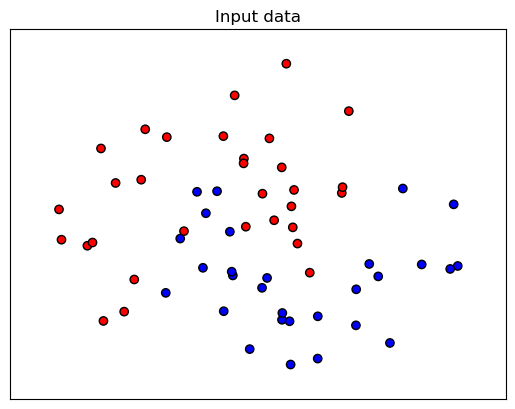

In [11]:
plot_dataset(X_train_scaled, y_train)

Let's plot all the data.

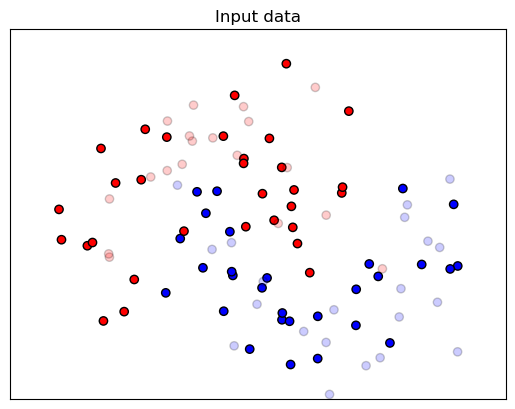

In [12]:
plot_dataset(X_train_scaled, y_train, X_test_scaled, y_test)

Let's run the perceptron.

Training error = 0.18333333333333335
Test error = 0.07499999999999996


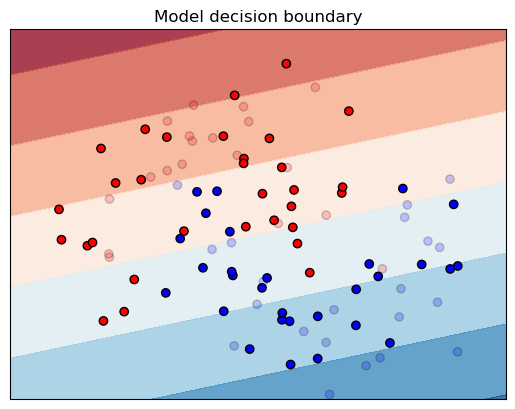

In [13]:
perceptron = Perceptron(random_state = 1213, tol=1e-4)
perceptron.fit(X_train_scaled, y_train)

plot_model(perceptron, X_train_scaled, y_train, X_test_scaled, y_test)

training_error = 1 - perceptron.score(X_train_scaled, y_train)
print("Training error =", training_error)

test_error = 1 - perceptron.score(X_test_scaled, y_test)
print("Test error =", test_error)

Let's run the SVM.

Training error = 0.16666666666666663
Test error = 0.125


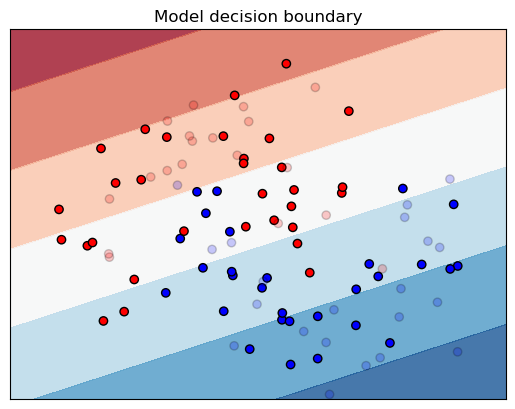

In [14]:
svm = SVC(kernel="linear", C=1)
svm.fit(X_train_scaled, y_train)

plot_model(svm, X_train_scaled, y_train, X_test_scaled, y_test)

training_error = 1 - svm.score(X_train_scaled, y_train)
print("Training error =", training_error)

test_error = 1 - svm.score(X_test_scaled, y_test)
print("Test error =", test_error)

Let's try the NN.

In [15]:
# -- TO COMPLETE

Training error = 0.01666666666666672
Test error = 0.050000000000000044


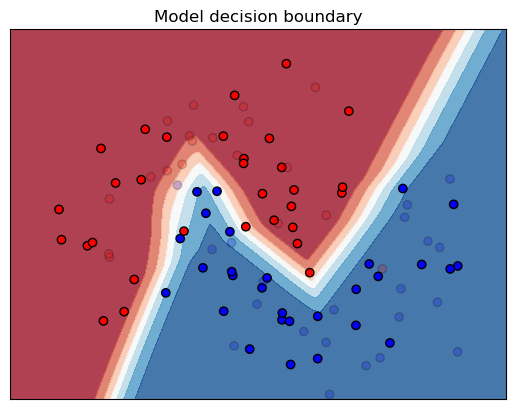

In [16]:
mlp = MLPClassifier(max_iter=1500)
mlp.fit(X_train_scaled, y_train)

plot_model(mlp, X_train_scaled, y_train, X_test_scaled, y_test)

training_error = 1 - mlp.score(X_train_scaled, y_train)
print("Training error =", training_error)

test_error = 1 - mlp.score(X_test_scaled, y_test)
print("Test error =", test_error)

This is due to non linerity in NN!

---

Another interesting dataset

In [17]:
X, y = make_circles(noise = 0.2, factor = 0.5, random_state = 1)

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Let's plot the training data.

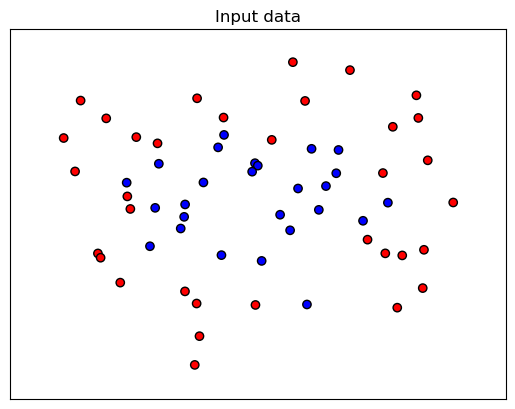

In [18]:
plot_dataset(X_train_scaled, y_train)

Let's plot all the data.

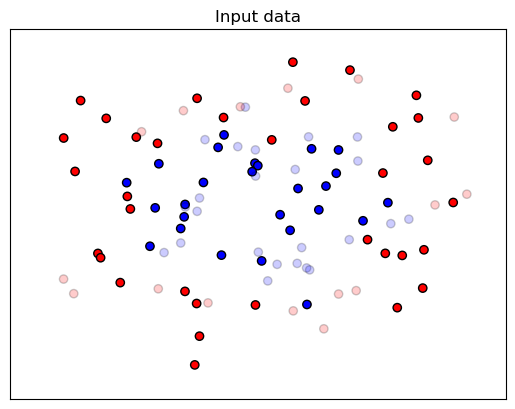

In [19]:
plot_dataset(X_train_scaled, y_train, X_test_scaled, y_test)

Let's run the perceptron.

Training error = 0.4833333333333333
Test error = 0.475


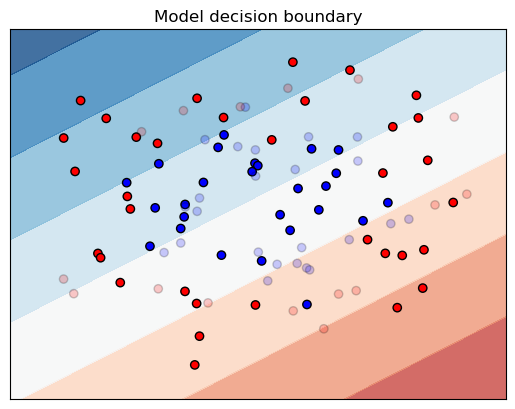

In [20]:
perceptron = Perceptron(random_state = 1213, tol=1e-4)
perceptron.fit(X_train_scaled, y_train)

plot_model(perceptron, X_train_scaled, y_train, X_test_scaled, y_test)

training_error = 1 - perceptron.score(X_train_scaled, y_train)
print("Training error =", training_error)

test_error = 1 - perceptron.score(X_test_scaled, y_test)
print("Test error =", test_error)

Let's run the SVM.

Training error = 0.43333333333333335
Test error = 0.6


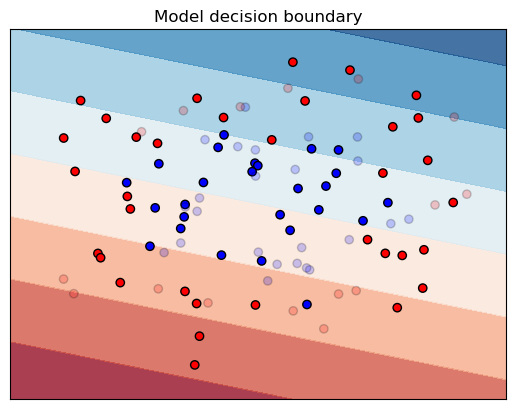

In [21]:
svm = SVC(kernel="linear", C=1)
svm.fit(X_train_scaled, y_train)

plot_model(svm, X_train_scaled, y_train, X_test_scaled, y_test)

training_error = 1 - svm.score(X_train_scaled, y_train)
print("Training error =", training_error)

test_error = 1 - svm.score(X_test_scaled, y_test)
print("Test error =", test_error)

Let's run the NN.

Training error = 0.033333333333333326
Test error = 0.125


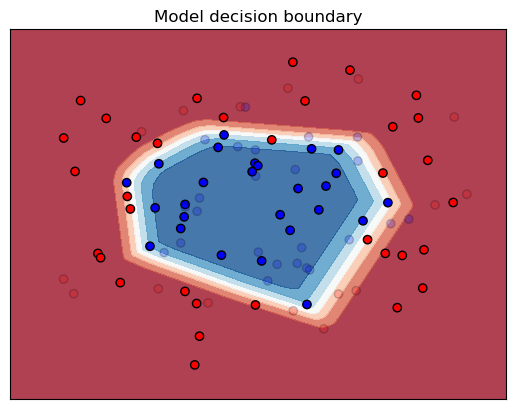

In [22]:
mlp = MLPClassifier(max_iter=1500)
mlp.fit(X_train_scaled, y_train)

plot_model(mlp, X_train_scaled, y_train, X_test_scaled, y_test)

training_error = 1 - mlp.score(X_train_scaled, y_train)
print("Training error =", training_error)

test_error = 1 - mlp.score(X_test_scaled, y_test)
print("Test error =", test_error)

You can try with SVM an kernels and compare the results with the NN! Are they better or worse?

---

Let's now consider the blobs dataset considered in the last Lab.

In [23]:
# -- make_blobs dataset

# -- generate the dataset
X, y = make_blobs(n_samples = 1000, centers = 2, n_features = 2, center_box=(-7.5, 7.5), random_state = 37, cluster_std = 2.8)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# -- scale data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Let's plot all the data.

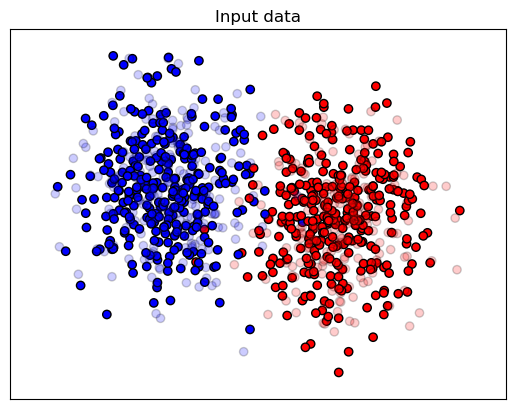

In [24]:
plot_dataset(X_train_scaled, y_train, X_test_scaled, y_test)

Let's run the perceptron

Training error = 0.043333333333333335
Test error = 0.030000000000000027


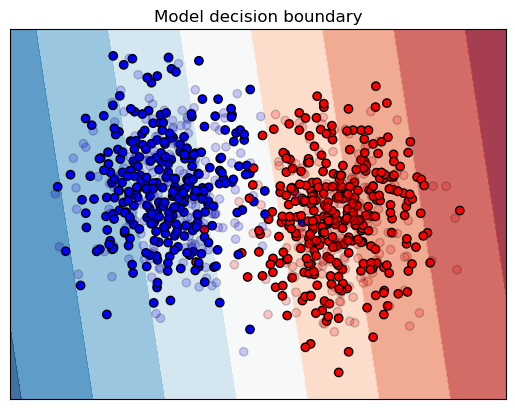

In [25]:
perceptron = Perceptron(random_state = 1213, tol=1e-4)
perceptron.fit(X_train_scaled, y_train)

plot_model(perceptron, X_train_scaled, y_train, X_test_scaled, y_test)

training_error = 1 - perceptron.score(X_train_scaled, y_train)
print("Training error =", training_error)

test_error = 1 - perceptron.score(X_test_scaled, y_test)
print("Test error =", test_error)

Let's run the SVM

Training error = 0.020000000000000018
Test error = 0.015000000000000013


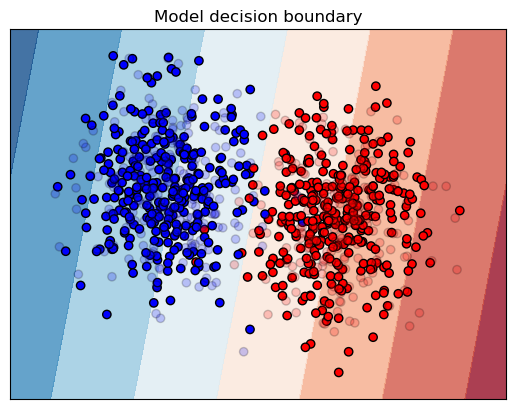

In [26]:
svm = SVC(kernel="linear", C=1)
svm.fit(X_train_scaled, y_train)

plot_model(svm, X_train_scaled, y_train, X_test_scaled, y_test)

training_error = 1 - svm.score(X_train_scaled, y_train)
print("Training error =", training_error)

test_error = 1 - svm.score(X_test_scaled, y_test)
print("Test error =", test_error)

Let's run the NN

Training error = 0.020000000000000018
Test error = 0.015000000000000013


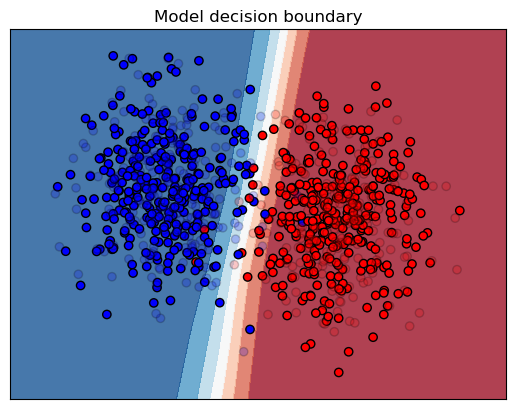

In [27]:
mlp = MLPClassifier(max_iter=1500)
mlp.fit(X_train_scaled, y_train)

plot_model(mlp, X_train_scaled, y_train, X_test_scaled, y_test)

training_error = 1 - mlp.score(X_train_scaled, y_train)
print("Training error =", training_error)

test_error = 1 - mlp.score(X_test_scaled, y_test)
print("Test error =", test_error)

# Second part: Regression on House Pricing Dataset
We consider a reduced version of a dataset containing house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

https://www.kaggle.com/harlfoxem/housesalesprediction

For each house we know 18 house features (e.g., number of bedrooms, number of bathrooms, etc.) plus its price, that is what we would like to predict.

In [28]:
# -- put here your ID_Number  (numero di matricola)
numero_di_matricola = 1

In [29]:
#import all packages needed
# %matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# -- avoid convergence warnings from sklearn library
import warnings
warnings.filterwarnings("ignore")

Load the data, remove data samples/points with missing values (NaN) and take a look at them.

In [30]:
# -- load the dataset
df = pd.read_csv('kc_house_data.csv', sep = ',')
# -- remove the data samples with missing values (NaN)
df = df.dropna() 

# -- see features_explained.pdf (if you want)
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,3.164000e+03,3.164000e+03,3164.000000,3164.000000,3164.000000,3.164000e+03,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000
mean,4.645240e+09,5.354358e+05,3.381163,2.071903,2070.027813,1.525054e+04,1.434893,0.009798,0.244311,3.459229,7.615676,1761.252212,308.775601,1967.489254,94.668774,98077.125158,47.557868,-122.212337,1982.544564,13176.302465
std,2.854203e+09,3.809004e+05,0.895472,0.768212,920.251879,4.254457e+04,0.507792,0.098513,0.776298,0.682592,1.166324,815.934864,458.977904,28.095275,424.439427,54.172937,0.140789,0.139577,686.256670,25413.180755
min,1.000102e+06,7.500000e+04,0.000000,0.000000,380.000000,6.490000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,380.000000,0.000000,1900.000000,0.000000,98001.000000,47.177500,-122.514000,620.000000,660.000000
25%,2.199775e+09,3.150000e+05,3.000000,1.500000,1430.000000,5.453750e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1950.000000,0.000000,98032.000000,47.459575,-122.324250,1480.000000,5429.500000
50%,4.027701e+09,4.450000e+05,3.000000,2.000000,1910.000000,8.000000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1545.000000,0.000000,1969.000000,0.000000,98059.000000,47.572500,-122.226000,1830.000000,7873.000000
75%,7.358175e+09,6.402500e+05,4.000000,2.500000,2500.000000,1.122250e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2150.000000,600.000000,1990.000000,0.000000,98117.000000,47.680250,-122.124000,2360.000000,10408.250000
max,9.839301e+09,5.350000e+06,8.000000,6.000000,8010.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,12.000000,6720.000000,2620.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,425581.000000


Extract input and output data. We want to predict the price by using features other than id as input.

In [31]:
Data = df.values
# -- m = number of input samples
m = Data.shape[0]
print("Amount of data:",m)
Y = Data[:m, 2]
X = Data[:m, 3:]

Amount of data: 3164


## Data Pre-Processing

We split the data into 3 parts: one will be used for training and choosing the parameters, one for choosing among different models, and one for testing. The part for training and choosing the parameters will consist of $2/3$ of all samples, the one for choosing among different models will consist of $1/6$ of all samples, while the other part consists of the remaining $1/6$-th of all samples.

In [32]:
# -- Split data into train (2/3 of samples), validation (1/6 of samples), and test data (the rest)
m_train = int(2./3.*m)
m_val = int((m-m_train)/2.)
m_test = m - m_train - m_val
print("Amount of data for training and deciding parameters:", m_train)
print("Amount of data for validation (choosing among different models):", m_val)
print("Amount of data for test:", m_test)

from sklearn.model_selection import train_test_split

X_train_and_val, X_test, Y_train_and_val, Y_test = train_test_split(X, Y, test_size = m_test/m, random_state = numero_di_matricola)
X_train, X_val, Y_train, Y_val = train_test_split(X_train_and_val, Y_train_and_val, 
                                                  test_size = m_val/(m_train + m_val), random_state = numero_di_matricola)

Amount of data for training and deciding parameters: 2109
Amount of data for validation (choosing among different models): 527
Amount of data for test: 528


Let's standardize the data.

In [33]:
# -- Data pre-processing
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)
X_train_and_val_scaled = scaler.transform(X_train_and_val)

## Neural Networks
Let's start by learning a simple neural network with 1 hidden node.
Note: we are going to use the input parameter solver='lbfgs' and random_state=numero_di_matricola to fix the random seed (so results are reproducible).

We hereby define a function to train an MLPRegressor on the (already scaled) training data and (optionally) print its parameters at the end of the training.

In [34]:
from sklearn.neural_network import MLPRegressor

def train_model(X_train, y_train, print_weights = True, **params):

    mlp_model = MLPRegressor(**params)
    mlp_model.fit(X_train_scaled, Y_train)

    # -- let's print the error (1 - R^2) on training data
    print(f'Training error: {(1.0 - mlp_model.score(X_train_scaled, Y_train)):.5f}')
    # -- let's print the error (1 - R^2) on validation data
    print(f'Validation error: {(1.0 - mlp_model.score(X_val_scaled, Y_val)):.5f}')

    if print_weights:

        weights = mlp_model.coefs_
        biases = mlp_model.intercepts_
    
        # -- let's print the coefficients of the model for the input nodes (but not the bias)
        print('\n--- Weights of NN ---')
    
        for i_layer, (w, b) in enumerate(zip(weights, biases)):
            print(f'\n# Layer {i_layer+1}')
            print(f'--- Weights, with shape {w.shape} ---')
            for i in range(w.shape[0]):
                for j in range(w.shape[1]):
                    print(f'w_({i+1}, {j+1})^({i_layer+1}): {w[i][j]:.3f}')
                    
            print(f'--- Biases, with shape {b.shape} ---')
            for i in range(b.shape[0]):
                print(f'b_{i+1}: {b[i]:.3f}')

In [35]:
# -- let's define the model
params = {'hidden_layer_sizes': (1, ), # i.e. 1 hideen layer of size 1. If (2,2,) => 2 hidden layer of size 2.
          'solver' : 'lbfgs', # ??
          'random_state' : numero_di_matricola,
         }
train_model(X_train, y_train, **params)

Training error: 0.26395
Validation error: 0.30404

--- Weights of NN ---

# Layer 1
--- Weights, with shape (18, 1) ---
w_(1, 1)^(1): -213.590
w_(2, 1)^(1): 268.134
w_(3, 1)^(1): 521.526
w_(4, 1)^(1): -60.447
w_(5, 1)^(1): 4.010
w_(6, 1)^(1): 708.088
w_(7, 1)^(1): 293.308
w_(8, 1)^(1): 135.858
w_(9, 1)^(1): 812.846
w_(10, 1)^(1): 491.003
w_(11, 1)^(1): 163.021
w_(12, 1)^(1): -579.756
w_(13, 1)^(1): 37.848
w_(14, 1)^(1): -202.550
w_(15, 1)^(1): 597.748
w_(16, 1)^(1): -141.329
w_(17, 1)^(1): 146.448
w_(18, 1)^(1): -26.790
--- Biases, with shape (1,) ---
b_1: 3779.110

# Layer 2
--- Weights, with shape (1, 1) ---
w_(1, 1)^(2): 141.699
--- Biases, with shape (1,) ---
b_1: -31.569


## Neural Networks vs Linear Models

Let's learn a linear model on the same data and compare the results with the simple NN above.

In [36]:
from sklearn import linear_model

LR = linear_model.LinearRegression()

LR.fit(X_train_scaled, Y_train)

# -- let's print the error (1 - R^2) on training data
print(f'Training error: {(1.0 - LR.score(X_train_scaled, Y_train)):.5f}')
# -- let's print the error (1 - R^2) on validation data
print(f'Validation error: {(1.0 - LR.score(X_val_scaled, Y_val)):.5f}')

print(f'\n--- Weights, with shape {LR.coef_.shape} ---\n{LR.coef_}')
print(f'\n--- Bias --- \n{LR.intercept_}')

Training error: 0.26536
Validation error: 0.31149

--- Weights, with shape (18,) ---
[-3.11272277e+04  3.58713682e+04  6.83900376e+16 -8.00003423e+03
  6.50837729e+02  1.00194786e+05  4.16702748e+04  1.94801424e+04
  1.11369329e+05 -6.14738710e+16 -3.38687690e+16 -7.82221897e+04
  6.53698840e+03 -2.81561017e+04  8.36906888e+04 -2.16140777e+04
  2.20558476e+04 -2.00693209e+03]

--- Bias --- 
536828.4713113868


Is there a way to make a NN network learn a linear model?
We can if we use the identity function as the activation function!

Let's first check what is the activation function used by MLPRegressor...

In [37]:
# -- let's write the code to learn a linear model with NN: how? 
params = {'hidden_layer_sizes': (1, ), 
          'solver' : 'lbfgs', 
          'random_state' : numero_di_matricola, 
          'activation' : "identity",
         }
train_model(X_train, y_train, **params)

Training error: 0.26536
Validation error: 0.31154

--- Weights of NN ---

# Layer 1
--- Weights, with shape (18, 1) ---
w_(1, 1)^(1): 51.551
w_(2, 1)^(1): -59.028
w_(3, 1)^(1): -122.969
w_(4, 1)^(1): 13.195
w_(5, 1)^(1): -1.107
w_(6, 1)^(1): -165.017
w_(7, 1)^(1): -68.625
w_(8, 1)^(1): -32.126
w_(9, 1)^(1): -183.340
w_(10, 1)^(1): -114.966
w_(11, 1)^(1): -38.516
w_(12, 1)^(1): 128.839
w_(13, 1)^(1): -10.762
w_(14, 1)^(1): 46.437
w_(15, 1)^(1): -137.839
w_(16, 1)^(1): 35.648
w_(17, 1)^(1): -36.322
w_(18, 1)^(1): 3.297
--- Biases, with shape (1,) ---
b_1: -883.447

# Layer 2
--- Weights, with shape (1, 1) ---
w_(1, 1)^(2): -607.243
--- Biases, with shape (1,) ---
b_1: 365.292


Try to compute the the values of the bias in the NN and compare it to the one obtained in the perceptron

Note that there is an $\ell_2$ regularization term in MLPRegressor. What about making it smaller?

In [38]:
# -- you can try to change alpha (e.g., huge value)
params = {'hidden_layer_sizes': (1, ), 
          'solver' : 'lbfgs', 
          'random_state' : numero_di_matricola, 
          'activation' : 'identity', 
          'alpha' : 1,# -- TO COMPLETE
         }
train_model(X_train, y_train, **params)

Training error: 0.26536
Validation error: 0.31154

--- Weights of NN ---

# Layer 1
--- Weights, with shape (18, 1) ---
w_(1, 1)^(1): 51.551
w_(2, 1)^(1): -59.028
w_(3, 1)^(1): -122.969
w_(4, 1)^(1): 13.195
w_(5, 1)^(1): -1.107
w_(6, 1)^(1): -165.017
w_(7, 1)^(1): -68.625
w_(8, 1)^(1): -32.126
w_(9, 1)^(1): -183.340
w_(10, 1)^(1): -114.966
w_(11, 1)^(1): -38.516
w_(12, 1)^(1): 128.839
w_(13, 1)^(1): -10.762
w_(14, 1)^(1): 46.437
w_(15, 1)^(1): -137.839
w_(16, 1)^(1): 35.648
w_(17, 1)^(1): -36.322
w_(18, 1)^(1): 3.297
--- Biases, with shape (1,) ---
b_1: -883.447

# Layer 2
--- Weights, with shape (1, 1) ---
w_(1, 1)^(2): -607.243
--- Biases, with shape (1,) ---
b_1: 365.292


## More Complex NNs

Let's try more complex NN, for example increasing the number of nodes in the only hidden layer, or increasing the number of hidden layers.

Let's build a NN with 2 nodes in the only hidden layer

In [39]:
# -- you can try to change alpha (e.g., huge value)
params = {'hidden_layer_sizes': (2, ), 
          'solver' : 'lbfgs', 
          'random_state' : numero_di_matricola, 
          'activation' : 'identity', 
          'alpha' : 1,
         }
train_model(X_train, y_train, **params)

Training error: 0.26536
Validation error: 0.31155

--- Weights of NN ---

# Layer 1
--- Weights, with shape (18, 2) ---
w_(1, 1)^(1): -40.624
w_(1, 2)^(1): -106.947
w_(2, 1)^(1): -195.545
w_(2, 2)^(1): -0.926
w_(3, 1)^(1): -302.640
w_(3, 2)^(1): 50.822
w_(4, 1)^(1): -20.019
w_(4, 2)^(1): -32.280
w_(5, 1)^(1): -77.579
w_(5, 2)^(1): -37.716
w_(6, 1)^(1): -271.077
w_(6, 2)^(1): 137.858
w_(7, 1)^(1): -207.356
w_(7, 2)^(1): 9.083
w_(8, 1)^(1): -55.166
w_(8, 2)^(1): 25.628
w_(9, 1)^(1): -333.816
w_(9, 2)^(1): 136.512
w_(10, 1)^(1): -261.401
w_(10, 2)^(1): 59.605
w_(11, 1)^(1): -136.255
w_(11, 2)^(1): -4.748
w_(12, 1)^(1): 104.180
w_(12, 2)^(1): -162.389
w_(13, 1)^(1): -50.826
w_(13, 2)^(1): -7.894
w_(14, 1)^(1): 41.063
w_(14, 2)^(1): -56.749
w_(15, 1)^(1): -214.877
w_(15, 2)^(1): 121.053
w_(16, 1)^(1): 35.364
w_(16, 2)^(1): -41.618
w_(17, 1)^(1): -210.611
w_(17, 2)^(1): -46.629
w_(18, 1)^(1): -20.306
w_(18, 2)^(1): -15.869
--- Biases, with shape (2,) ---
b_1: -1178.372
b_2: 876.379

# Layer 

Let's build a NN with 5 nodes in the only hidden layer

In [40]:
# -- you can try to change alpha (e.g., huge value)
params = {'hidden_layer_sizes': (5, ), 
          'solver' : 'lbfgs', 
          'random_state' : numero_di_matricola, 
          'activation' : 'identity', 
          'alpha' : 1,# -- TO COMPLETE
         }
train_model(X_train, y_train, **params)

Training error: 0.26536
Validation error: 0.31154

--- Weights of NN ---

# Layer 1
--- Weights, with shape (18, 5) ---
w_(1, 1)^(1): -46.977
w_(1, 2)^(1): 34.778
w_(1, 3)^(1): 75.657
w_(1, 4)^(1): -137.605
w_(1, 5)^(1): 95.029
w_(2, 1)^(1): -110.912
w_(2, 2)^(1): 140.138
w_(2, 3)^(1): 79.758
w_(2, 4)^(1): -246.849
w_(2, 5)^(1): 107.125
w_(3, 1)^(1): -153.144
w_(3, 2)^(1): 207.709
w_(3, 3)^(1): 88.557
w_(3, 4)^(1): -324.519
w_(3, 5)^(1): 122.040
w_(4, 1)^(1): -19.606
w_(4, 2)^(1): 17.342
w_(4, 3)^(1): 27.377
w_(4, 4)^(1): -54.601
w_(4, 5)^(1): 34.240
w_(5, 1)^(1): -52.799
w_(5, 2)^(1): 59.090
w_(5, 3)^(1): 53.215
w_(5, 4)^(1): -129.992
w_(5, 5)^(1): 69.577
w_(6, 1)^(1): -107.379
w_(6, 2)^(1): 171.483
w_(6, 3)^(1): 18.638
w_(6, 4)^(1): -195.516
w_(6, 5)^(1): 35.292
w_(7, 1)^(1): -97.714
w_(7, 2)^(1): 129.089
w_(7, 3)^(1): 61.611
w_(7, 4)^(1): -210.136
w_(7, 5)^(1): 83.592
w_(8, 1)^(1): -16.942
w_(8, 2)^(1): 29.021
w_(8, 3)^(1): -0.243
w_(8, 4)^(1): -28.088
w_(8, 5)^(1): 1.481
w_(9, 1)^(

Let's build a NN with 10 nodes in the only hidden layer

In [41]:
# -- you can try to change alpha (e.g., huge value)
params = {'hidden_layer_sizes': (10, ), 
          'solver' : 'lbfgs', 
          'random_state' : numero_di_matricola, 
          'activation' : 'identity', 
          'alpha' : 1,# -- TO COMPLETE
         }
train_model(X_train, y_train, **params)

Training error: 0.26536
Validation error: 0.31154

--- Weights of NN ---

# Layer 1
--- Weights, with shape (18, 10) ---
w_(1, 1)^(1): -112.969
w_(1, 2)^(1): -227.317
w_(1, 3)^(1): 117.091
w_(1, 4)^(1): 146.732
w_(1, 5)^(1): 234.557
w_(1, 6)^(1): 210.541
w_(1, 7)^(1): -221.355
w_(1, 8)^(1): -140.788
w_(1, 9)^(1): 69.098
w_(1, 10)^(1): 201.603
w_(2, 1)^(1): -208.709
w_(2, 2)^(1): -400.321
w_(2, 3)^(1): 211.673
w_(2, 4)^(1): 255.197
w_(2, 5)^(1): 394.303
w_(2, 6)^(1): 385.183
w_(2, 7)^(1): -419.095
w_(2, 8)^(1): -246.274
w_(2, 9)^(1): 114.392
w_(2, 10)^(1): 384.495
w_(3, 1)^(1): -278.560
w_(3, 2)^(1): -529.169
w_(3, 3)^(1): 281.593
w_(3, 4)^(1): 336.066
w_(3, 5)^(1): 516.787
w_(3, 6)^(1): 513.601
w_(3, 7)^(1): -563.364
w_(3, 8)^(1): -325.799
w_(3, 9)^(1): 149.303
w_(3, 10)^(1): 518.068
w_(4, 1)^(1): -44.709
w_(4, 2)^(1): -88.490
w_(4, 3)^(1): 46.342
w_(4, 4)^(1): 56.946
w_(4, 5)^(1): 90.576
w_(4, 6)^(1): 82.440
w_(4, 7)^(1): -87.139
w_(4, 8)^(1): -54.288
w_(4, 9)^(1): 26.111
w_(4, 10)^(1

Let's build a NN with 100 nodes in the only hidden layer. Note that this is the default!

In [42]:
# -- you can try to change alpha (e.g., huge value)
params = {'hidden_layer_sizes': (100, ), 
          'solver' : 'lbfgs', 
          'random_state' : numero_di_matricola, 
          'activation' : 'identity', 
          'alpha' : 1,# -- TO COMPLETE
         }
train_model(X_train, y_train, **params)

Training error: 0.26536
Validation error: 0.31154

--- Weights of NN ---

# Layer 1
--- Weights, with shape (18, 100) ---
w_(1, 1)^(1): -68.539
w_(1, 2)^(1): -12.810
w_(1, 3)^(1): 73.408
w_(1, 4)^(1): 14.884
w_(1, 5)^(1): -8.502
w_(1, 6)^(1): -2.864
w_(1, 7)^(1): 18.897
w_(1, 8)^(1): -11.963
w_(1, 9)^(1): -62.322
w_(1, 10)^(1): -79.788
w_(1, 11)^(1): -73.832
w_(1, 12)^(1): -96.271
w_(1, 13)^(1): 10.944
w_(1, 14)^(1): 74.583
w_(1, 15)^(1): -28.425
w_(1, 16)^(1): -89.123
w_(1, 17)^(1): -14.581
w_(1, 18)^(1): 20.122
w_(1, 19)^(1): -16.483
w_(1, 20)^(1): 65.270
w_(1, 21)^(1): 97.232
w_(1, 22)^(1): 78.456
w_(1, 23)^(1): 43.459
w_(1, 24)^(1): -4.896
w_(1, 25)^(1): 36.789
w_(1, 26)^(1): -100.945
w_(1, 27)^(1): 102.845
w_(1, 28)^(1): -71.318
w_(1, 29)^(1): 87.354
w_(1, 30)^(1): 59.951
w_(1, 31)^(1): 64.256
w_(1, 32)^(1): -47.909
w_(1, 33)^(1): -60.994
w_(1, 34)^(1): -10.465
w_(1, 35)^(1): 69.225
w_(1, 36)^(1): -8.388
w_(1, 37)^(1): 93.110
w_(1, 38)^(1): -29.306
w_(1, 39)^(1): 24.978
w_(1, 40)^

Let's try 2 layers, 1 node each

In [43]:
# -- you can try to change alpha (e.g., huge value)
params = {'hidden_layer_sizes': (1,1, ), 
          'solver' : 'lbfgs', 
          'random_state' : numero_di_matricola, 
          'activation' : 'identity', 
          'alpha' : 1,# -- TO COMPLETE
         }
train_model(X_train, y_train, **params)

Training error: 0.26536
Validation error: 0.31154

--- Weights of NN ---

# Layer 1
--- Weights, with shape (18, 1) ---
w_(1, 1)^(1): 5.459
w_(2, 1)^(1): -6.251
w_(3, 1)^(1): -13.264
w_(4, 1)^(1): 1.397
w_(5, 1)^(1): -0.117
w_(6, 1)^(1): -17.475
w_(7, 1)^(1): -7.267
w_(8, 1)^(1): -3.402
w_(9, 1)^(1): -19.415
w_(10, 1)^(1): -11.957
w_(11, 1)^(1): -3.959
w_(12, 1)^(1): 13.643
w_(13, 1)^(1): -1.140
w_(14, 1)^(1): 4.917
w_(15, 1)^(1): -14.597
w_(16, 1)^(1): 3.775
w_(17, 1)^(1): -3.846
w_(18, 1)^(1): 0.349
--- Biases, with shape (1,) ---
b_1: -92.798

# Layer 2
--- Weights, with shape (1, 1) ---
w_(1, 1)^(2): -69.778
--- Biases, with shape (1,) ---
b_1: 56.854

# Layer 3
--- Weights, with shape (1, 1) ---
w_(1, 1)^(3): 82.179
--- Biases, with shape (1,) ---
b_1: 33.371


Let's try 2 layers, 2 nodes each

In [44]:
# -- you can try to change alpha (e.g., huge value)
params = {'hidden_layer_sizes': (2,2, ), 
          'solver' : 'lbfgs', 
          'random_state' : numero_di_matricola, 
          'activation' : 'identity', 
          'alpha' : 1,# -- TO COMPLETE
         }
train_model(X_train, y_train, **params)

Training error: 0.26536
Validation error: 0.31155

--- Weights of NN ---

# Layer 1
--- Weights, with shape (18, 2) ---
w_(1, 1)^(1): 267.039
w_(1, 2)^(1): -293.373
w_(2, 1)^(1): 484.714
w_(2, 2)^(1): -524.126
w_(3, 1)^(1): 645.315
w_(3, 2)^(1): -695.659
w_(4, 1)^(1): 104.452
w_(4, 2)^(1): -114.370
w_(5, 1)^(1): 254.130
w_(5, 2)^(1): -276.445
w_(6, 1)^(1): 400.030
w_(6, 2)^(1): -426.163
w_(7, 1)^(1): 428.759
w_(7, 2)^(1): -462.712
w_(8, 1)^(1): 62.130
w_(8, 2)^(1): -65.828
w_(9, 1)^(1): 608.581
w_(9, 2)^(1): -652.074
w_(10, 1)^(1): 551.437
w_(10, 2)^(1): -593.356
w_(11, 1)^(1): 302.566
w_(11, 2)^(1): -326.928
w_(12, 1)^(1): 32.635
w_(12, 2)^(1): -42.586
w_(13, 1)^(1): 107.503
w_(13, 2)^(1): -116.368
w_(14, 1)^(1): -66.790
w_(14, 2)^(1): 70.117
w_(15, 1)^(1): 282.540
w_(15, 2)^(1): -299.819
w_(16, 1)^(1): 25.119
w_(16, 2)^(1): -29.292
w_(17, 1)^(1): 556.783
w_(17, 2)^(1): -603.764
w_(18, 1)^(1): 91.207
w_(18, 2)^(1): -99.421
--- Biases, with shape (2,) ---
b_1: 1287.557
b_2: -1386.187



Try other architectures!

In [45]:
# -- you can try to change alpha (e.g., huge value)
params = {'hidden_layer_sizes': (3,3,3,3,3,3,3,3,3,3,3, ), 
          'solver' : 'lbfgs', 
          'random_state' : numero_di_matricola, 
          'activation' : 'identity', 
          'alpha' : 10e-4,# -- TO COMPLETE
         }
train_model(X_train, y_train, **params)

Training error: 0.26536
Validation error: 0.31153

--- Weights of NN ---

# Layer 1
--- Weights, with shape (18, 3) ---
w_(1, 1)^(1): 0.142
w_(1, 2)^(1): 0.527
w_(1, 3)^(1): -0.383
w_(2, 1)^(1): 0.011
w_(2, 2)^(1): -0.120
w_(2, 3)^(1): -0.336
w_(3, 1)^(1): -0.365
w_(3, 2)^(1): -0.388
w_(3, 3)^(1): -0.377
w_(4, 1)^(1): 0.073
w_(4, 2)^(1): -0.089
w_(4, 3)^(1): 0.185
w_(5, 1)^(1): -0.236
w_(5, 2)^(1): 0.456
w_(5, 3)^(1): -0.481
w_(6, 1)^(1): -0.129
w_(6, 2)^(1): -0.648
w_(6, 3)^(1): -0.407
w_(7, 1)^(1): -0.385
w_(7, 2)^(1): -0.362
w_(7, 3)^(1): 0.170
w_(8, 1)^(1): 0.365
w_(8, 2)^(1): -0.397
w_(8, 3)^(1): 0.040
w_(9, 1)^(1): 0.063
w_(9, 2)^(1): -0.367
w_(9, 3)^(1): -1.069
w_(10, 1)^(1): -0.505
w_(10, 2)^(1): -0.537
w_(10, 3)^(1): 0.205
w_(11, 1)^(1): -0.467
w_(11, 2)^(1): -0.201
w_(11, 3)^(1): 0.313
w_(12, 1)^(1): 0.297
w_(12, 2)^(1): 0.572
w_(12, 3)^(1): 0.100
w_(13, 1)^(1): 0.156
w_(13, 2)^(1): 0.292
w_(13, 3)^(1): -0.590
w_(14, 1)^(1): 0.050
w_(14, 2)^(1): 0.223
w_(14, 3)^(1): 0.050
w_(

How can we find the best architecture?
We can use the k-Folt Cross Validation!

### $k$-Fold Cross Validation

Let's try 5-fold cross-validation with number of nodes in the hidden layer between 1 and 20. Note that we use train and validation data together, since we are doing cross-validation.

Note: you can also try to change the maximum amount of iterations to see what happens (see documentation for max_iter parameter)

In [46]:
from sklearn.model_selection import KFold
from itertools import product

def k_fold_cross_validation(X_train, Y_train, random_state, num_folds = 5):
    
    # -- grid of hyperparams
    param_grid = {'hidden_layer_sizes': [(1, ), (1, 1,)],
                  'activation': ["identity"],
                  'solver': ["lbfgs"],
                  'random_state': [random_state],
                  'max_iter': [1000],
                 }

    param_list = [
    {'hidden_layer_sizes': hls, 'activation': act, 'solver': solv, 'random_state': rs, 'max_iter': mit}
    for hls, act, solv, rs, mit in product(
        param_grid['hidden_layer_sizes'],
        param_grid['activation'],
        param_grid['solver'],
        param_grid['random_state'],
        param_grid['max_iter']
    )
    ]
    
    kf = KFold(n_splits = num_folds)
    err_validation_kfold = np.zeros(len(param_list),)
    err_training_kfold = np.zeros(len(param_list),)

    for i, p_list in enumerate(param_list):
        mlp_model = MLPRegressor(p_list)
        #mlp_model.fit(X_train_scaled, Y_train)
    
        #print(f'#{i+1} Performing k-fold for  = {c}...')
        
        for train_index, validation_index in kf.split(X_train):
            X_train_kfold, X_val_kfold = X_train[train_index], X_train[validation_index]
            Y_train_kfold, Y_val_kfold = Y_train[train_index], Y_train[validation_index]
            
            # -- data scaling: standardize features with respect to the current folds
            scaler_kfold = preprocessing.StandardScaler().fit(X_train_kfold)
            X_train_kfold_scaled = scaler_kfold.transform(X_train_kfold)
            X_val_kfold_scaled = scaler_kfold.transform(X_val_kfold)
        
            # -- learn the model using the training data from the k-fold
            mlp_model.fit(X_train_kfold_scaled, Y_train_kfold)
            
            # -- incremental mean
            err_training_kfold[i] += (1.0 - mlp_model.score(X_train_kfold, Y_train_kfold))
            err_validation_kfold[i] += (1.0 - mlp_model.score(X_val_kfold_scaled, Y_val_kfold))
    
    
    # -- compute the mean => estimate of validation losses and errors for each C
    err_training_kfold /= num_folds
    err_validation_kfold /= num_folds
    
    # -- choose the C parameter that minimizes the (the estimation of the true) loss
    opt_params = p_list[np.argmin(err_validation_kfold)]
    print(opt_params)

In [54]:
# -- obtain the best paramaters by running k_fold_cross_validation on training data
X_train_and_val_scaled.shape, Y_train_and_val.shape
#k_fold_cross_validation(X_train_and_val_scaled, Y_train_and_val, 10, 5)

((2636, 18), (2636,))

In [ ]:
# -- let's train the model with best_param on train and validation
# -- TO COMPLETE

In [ ]:
# -- let's compute the test error
# -- TO COMPLETE